In [1]:
%matplotlib inline

In [2]:
import scipy as sp
import scipy.interpolate
import numpy as np
import glob #to read the files
from sklearn.decomposition import PCA
from ipywidgets import *
from tabulate import tabulate #to export in table format

In [3]:
x = np.linspace(-10,50,61)
y = np.linspace(3300,8500,521)

In [4]:
sn_names=glob.glob("*.dat")
print(len(sn_names))

59


In [5]:
sn_names[0]

'SN2003du.dat'

In [6]:
X = []

In [7]:
max_sup = []

In [8]:
file = open("factors.txt")
lines = file.readlines()
file.close()

In [9]:
max_names = []
max_values = []

In [10]:
ll = []

In [11]:
for line in lines:
    if line.startswith('#'): continue
    co=line.rstrip().replace('INDEF','Nan').split()

    max_names.append(co[0])
    max_values.append(co[1])

In [12]:
new_names = []

In [13]:
sort = []

In [14]:
for k in range(0,len(sn_names)):
    
    if sn_names[k][:-4] in max_names:
        
        idx = max_names.index(sn_names[k][:-4])
        #print(float(max_values[idx]))
    
        file = open(sn_names[k])
        lines = file.readlines()
        file.close()

        xtemp = []

        for line in lines:

            if line.startswith('#'): continue
            co=line.rstrip().replace('INDEF','Nan').split()

            xtemp.append(co[0])

        xtemp = np.array(xtemp, dtype=float)
        
        xtemp = xtemp*float(max_values[idx])
        

        #xtemp = xtemp/max(xtemp)
        new_names.append(sn_names[k])

        if max(xtemp) < 0.02:

            ll.append(max(xtemp))
            z = np.reshape(xtemp, (521, 61))

            zz = []
            xx = []
            yy = []

            for i in range(0,len(y)):

                for j in range(0,len(x)):

                    zz.append(z[i][j])
                    xx.append(x[j])
                    yy.append(y[i])


            sort.append(sn_names[k][:-4])

            X.append(np.array(zz))

In [15]:
len(X)

54

In [16]:
ll.index(max(ll))

53

<IPython.core.display.Javascript object>


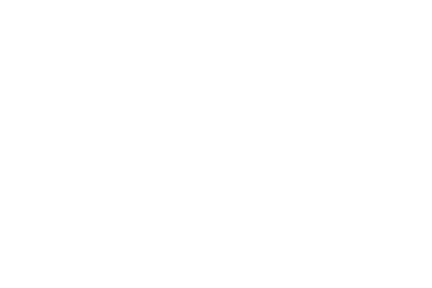

In [17]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook
plt.hist(ll, bins=10)
#plt.xlim(0,30)
plt.xlabel("contagem/s")
plt.ylabel("# de max")
plt.show()

In [18]:
new_names[1]

'SN2001V.dat'

In [19]:
ll

[0.010760827077,
 0.0040478969079999995,
 0.00125130266634,
 0.00023500196279,
 0.0008899259508200001,
 0.0004417355278,
 0.0007593207777,
 0.0061713375955,
 0.0059717808936,
 0.0012289284238,
 0.0009133253567399999,
 0.00068793104044,
 0.0026229495992700002,
 0.0020502067980800003,
 0.00120950705148,
 0.0086583867055,
 0.00045450097116,
 0.0030301139002800004,
 0.0131498615599,
 0.00123007365932,
 0.00047702458352,
 0.0099168599762,
 0.0007608510208,
 0.000410904396,
 0.0103725108478,
 0.0004146654853,
 0.0128507963453,
 0.0061973743146,
 0.005529569577600001,
 0.0169361315514,
 0.007149935065,
 0.0040116258666,
 0.0008416130976,
 0.0028193620309499997,
 0.0013755464708999998,
 0.00199165883895,
 0.00024287186939400001,
 0.0015646595664,
 0.000641355876,
 0.0135285506048,
 0.00015535141957499998,
 0.0118706601429,
 0.004617653345,
 0.00041667390045,
 0.0010956944082,
 0.0016769442014400002,
 0.0022305961188,
 0.0036465121524,
 0.0016623543384,
 0.005377318056,
 0.0099615977814,
 0.000

In [20]:
x[10]

0.0

In [21]:
len(X)

54

In [22]:
N = 3

In [23]:
from numpy.random import RandomState

In [24]:
rng = RandomState(0)

pca = PCA(n_components=3, whiten=True, svd_solver = 'randomized')
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='randomized', tol=0.0, whiten=True)

In [25]:
pca.noise_variance_

4.627703172953145e-05

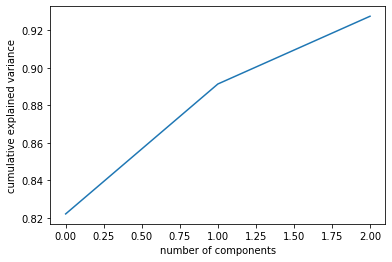

In [26]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [27]:
range(N)

range(0, 3)

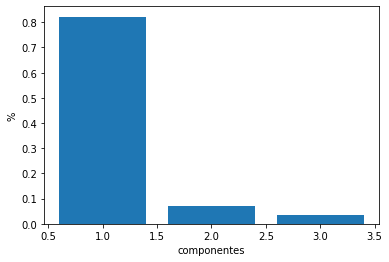

In [28]:
%matplotlib inline
plt.bar(np.linspace(1,N,N), pca.explained_variance_ratio_, alpha=1, align='center',label='individual explained variance')
plt.xlabel("componentes")
plt.ylabel("%")
plt.show()

## Soma das variancias relativas

### primeira

In [29]:
pca.explained_variance_ratio_[0]

0.8221450737595088

### primeira e segunda

In [30]:
pca.explained_variance_ratio_[0]+pca.explained_variance_ratio_[1]

0.8913824846804572

### primeira, segunda e terceira

In [31]:
pca.explained_variance_ratio_[0]+pca.explained_variance_ratio_[1]+pca.explained_variance_ratio_[2]

0.9274882583629906

In [32]:
'''
fig, axes = plt.subplots(2, 2, figsize=(10, 6),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(721, 71), cmap='bone',aspect='auto',interpolation = 'bilinear')
'''

"\nfig, axes = plt.subplots(2, 2, figsize=(10, 6),\n                         subplot_kw={'xticks':[], 'yticks':[]},\n                         gridspec_kw=dict(hspace=0.1, wspace=0.1))\nfor i, ax in enumerate(axes.flat):\n    ax.imshow(pca.components_[i].reshape(721, 71), cmap='bone',aspect='auto',interpolation = 'bilinear')\n"

In [33]:
#pca = PCA(N).fit(X)
components = pca.transform(X)
projected = pca.inverse_transform(components)

In [34]:
pca.components_[0]

array([-7.65983755e-06, -4.89691823e-06,  5.64575400e-07, ...,
        1.04890490e-04,  9.63814725e-05,  9.00555880e-05])

In [35]:
'''

fig, ax = plt.subplots(2, 2, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(2):
    ax[0, i].imshow(X[i].reshape(721, 71), cmap='bone',aspect='auto',interpolation = 'bilinear')
    ax[1, i].imshow(projected[i].reshape(721, 71), cmap='bone',aspect='auto',interpolation = 'bilinear')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('25-dim\nreconstruction');
'''

"\n\nfig, ax = plt.subplots(2, 2, figsize=(10, 2.5),\n                       subplot_kw={'xticks':[], 'yticks':[]},\n                       gridspec_kw=dict(hspace=0.1, wspace=0.1))\nfor i in range(2):\n    ax[0, i].imshow(X[i].reshape(721, 71), cmap='bone',aspect='auto',interpolation = 'bilinear')\n    ax[1, i].imshow(projected[i].reshape(721, 71), cmap='bone',aspect='auto',interpolation = 'bilinear')\n    \nax[0, 0].set_ylabel('full-dim\ninput')\nax[1, 0].set_ylabel('25-dim\nreconstruction');\n"

In [36]:

        
        if max(xtemp) < 0.02:x_grid = np.linspace(-10,50,61)
y_grid = np.linspace(3300,8500,521)
B1, B2 = np.meshgrid(x_grid, y_grid, indexing='xy')

# Media da distribuição realizada pelo pca

<IPython.core.display.Javascript object>


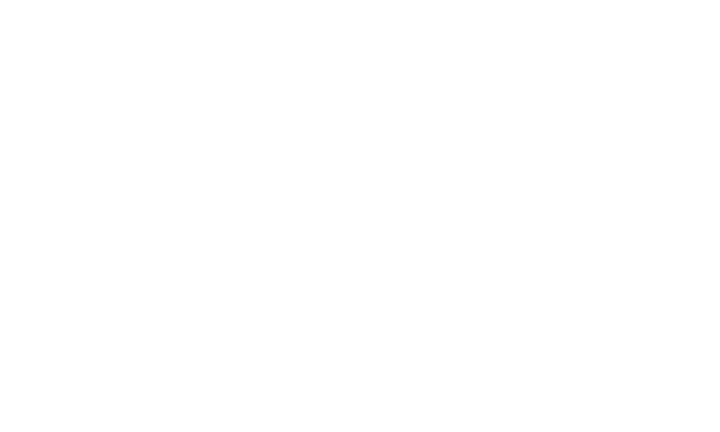

<IPython.core.display.Javascript object>


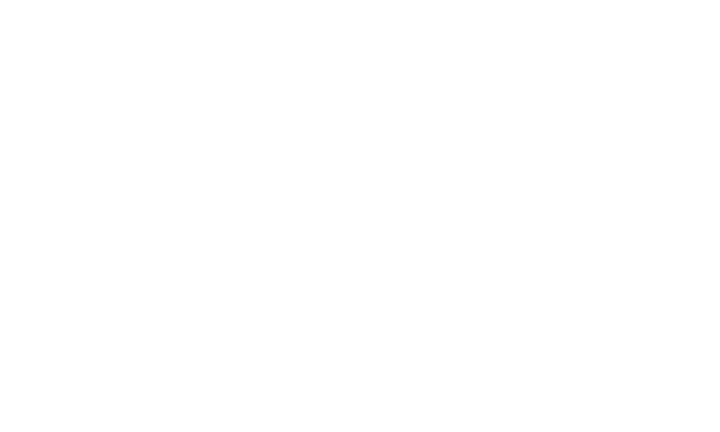

In [37]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import scipy.interpolate as interp

%matplotlib notebook

Z = interp.griddata((xx,yy),pca.mean_,(B1,B2),method='cubic')
#Z = splinemean(B1, B2)
fig = plt.figure(figsize=(10,6))
ax = axes3d.Axes3D(fig)
ax.plot_wireframe(B1, B2, Z)
ax.plot_surface(B1, B2, Z,alpha=0.4)
#ax.scatter3D(xx,yy,pca.components_[0], c='r')
#ax3.set_xlim(3500, 7500)
#ax3.set_ylim(-10, 50)
#ax.set_zlim(0, max(pca.components_[1]))

plt.show()

# Componentes

In [38]:
optionslist = []

for i in range(0,N):
    
    optionslist.append(i)

<IPython.core.display.Javascript object>


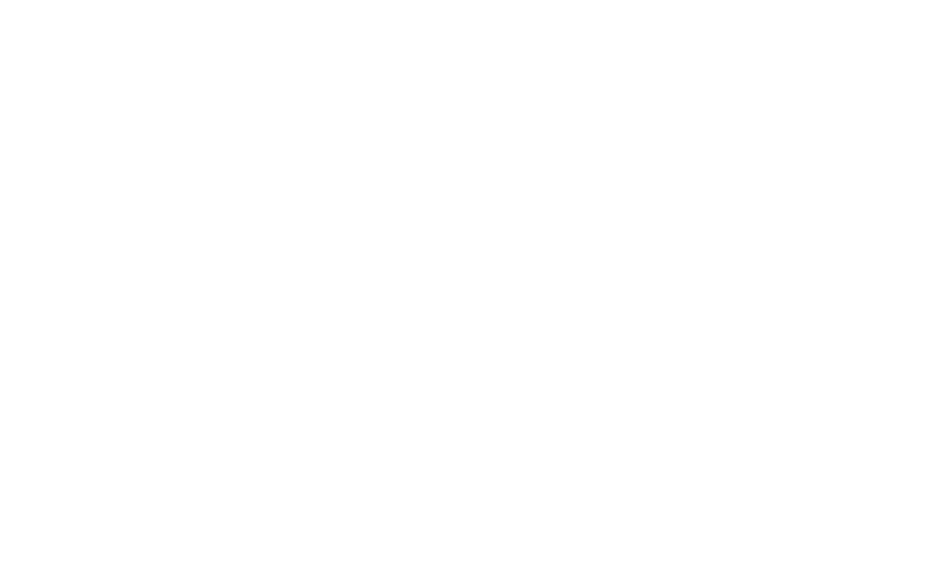

interactive(children=(Dropdown(description='Component:', options=(0, 1, 2), value=0), Output()), _dom_classes=…

<IPython.core.display.Javascript object>


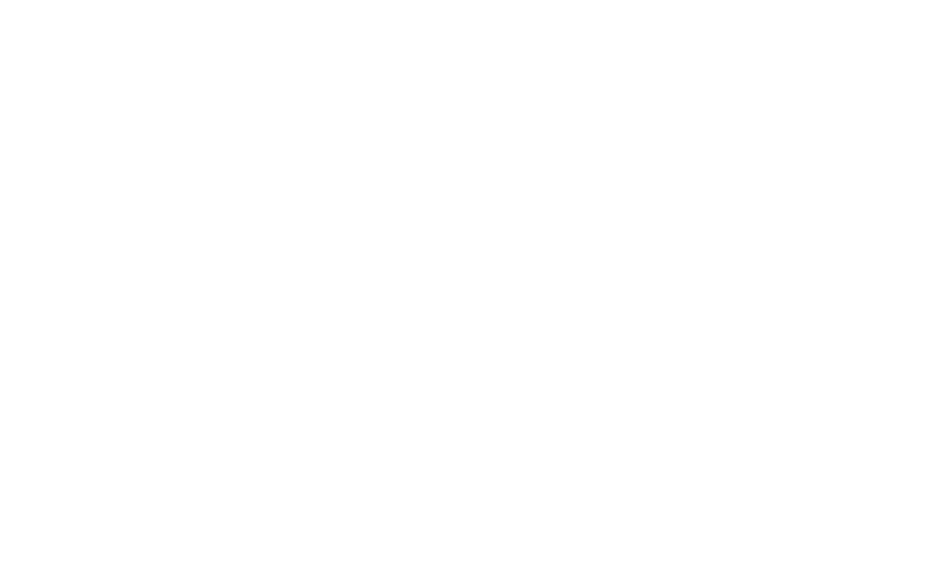

In [39]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import scipy.interpolate as interp

%matplotlib notebook

fig = plt.figure(figsize=(13,7.8))
ax = axes3d.Axes3D(fig)

def update_graph(i):
    
    ax.clear()
    
    Z = interp.griddata((xx,yy),pca.components_[i],(B1,B2),method='cubic')
    #Z = splinemean(B1, B2)
    #ax.scatter3D(xx,yy,pca.components_[i], c='r')
    ax.plot_wireframe(B1, B2, Z)
    ax.plot_surface(B1, B2, Z,alpha=0.4)
    #ax.set_zlim([0, 0.04])
    plt.show()
    
i = widgets.Dropdown(options=optionslist, value=0, description='Component:', disabled=False)

widgets.interactive(update_graph,i = i)

# Superficies com N componentes

In [40]:
optionslistsup = []

for i in range(0,len(X)):
    
    optionslistsup.append(i)

<IPython.core.display.Javascript object>


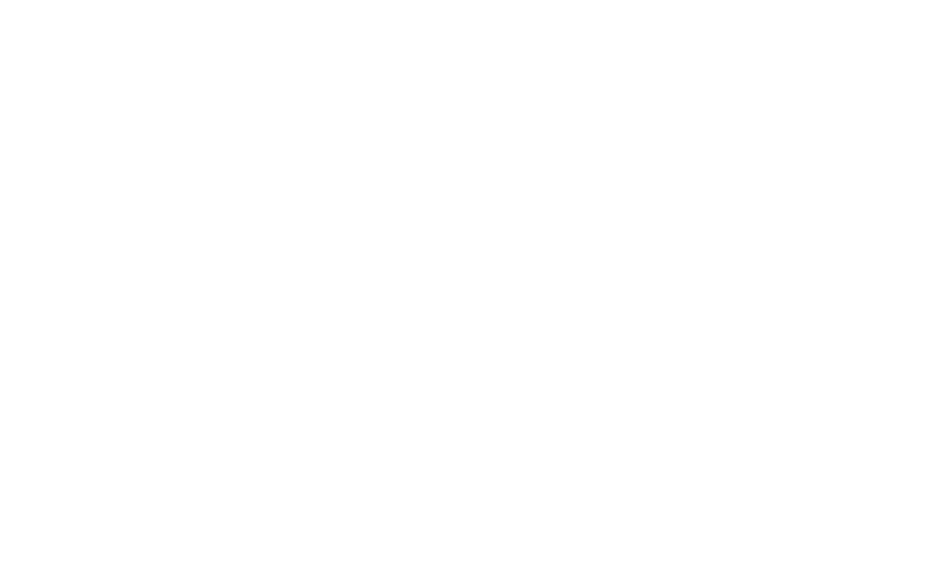

interactive(children=(Dropdown(description='Superficie:', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1…

In [41]:
%matplotlib notebook

fig = plt.figure(figsize=(13,7.8))
ax = axes3d.Axes3D(fig)

def update_graph(i):
    
    ax.clear()
    
    Z = interp.griddata((xx,yy),projected[i],(B1,B2),method='cubic')
    #Z = splinemean(B1, B2)

    ax.plot_wireframe(B1, B2, Z)
    ax.plot_surface(B1, B2, Z,alpha=0.4)
    plt.show()
    
    


i = widgets.Dropdown(options=optionslistsup, value=0, description='Superficie:', disabled=False)

widgets.interactive(update_graph,i = i)


# Superficies originais

In [42]:
optionslistsupori = []

for i in range(0,len(X)):
    
    optionslistsupori.append(i)

<IPython.core.display.Javascript object>


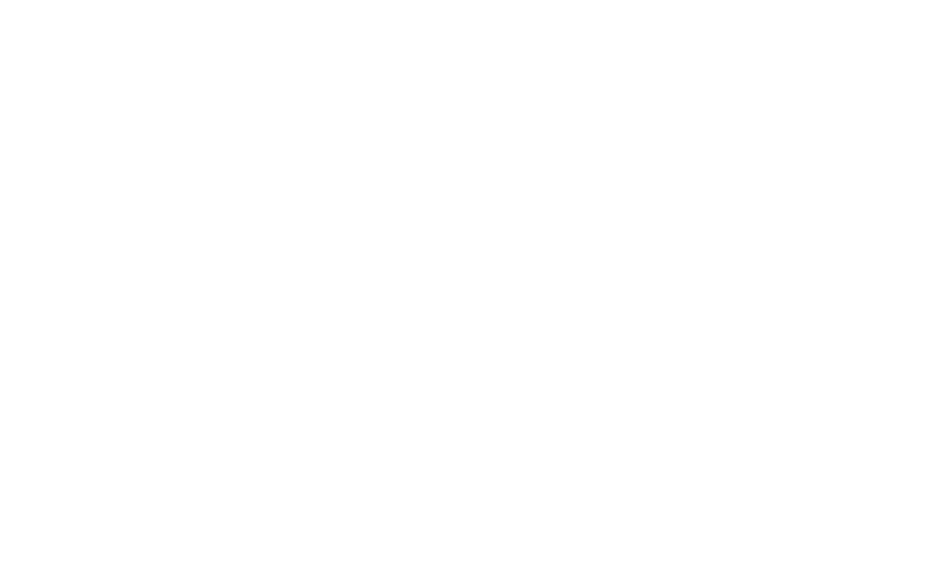

interactive(children=(Dropdown(description='Superficie:', index=11, options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,…

In [43]:
%matplotlib notebook

fig = plt.figure(figsize=(13,7.8))
ax = axes3d.Axes3D(fig)

def update_graph(i):
    
    ax.clear()
    
    Z = interp.griddata((xx,yy),X[i],(B1,B2),method='cubic')
    #Z = splinemean(B1, B2)

    ax.plot_wireframe(B1, B2, Z)
    #ax.scatter3D(xx, yy, X[i], c='r')
    ax.plot_surface(B1, B2, Z,alpha=0.4)
    plt.show()
    
    


i = widgets.Dropdown(options=optionslistsupori, value=11, description='Superficie:', disabled=False)

widgets.interactive(update_graph,i = i)

In [44]:
new_names[11]

'SN2012fr.dat'

In [45]:
pca.components_[0]

array([-7.65983755e-06, -4.89691823e-06,  5.64575400e-07, ...,
        1.04890490e-04,  9.63814725e-05,  9.00555880e-05])

In [46]:
len(pca.components_[0])

31781

In [47]:
Z = interp.griddata((xx,yy),pca.components_[0],(B1,B2),method='cubic')

In [48]:
len(Z)

521

In [49]:
teste = Z.transpose()

In [50]:
len(teste)

61

In [51]:
exp_x = []
exp_y = []
exp_z = []

for i in range(0,len(x)):
    
    for j in range(0,len(y)):
        
        exp_x.append(x[i])
        exp_y.append(y[j])
        exp_z.append(teste[i][j])
        

In [52]:
save_path = '/home/joao/Documentos'

In [53]:

table = []
for l in range(0,len(exp_x)):
    table.append((exp_x[l],exp_y[l],exp_z[l]))


completeName = os.path.join(save_path, "M0.dat")

f = open(completeName, 'w')
f.write(tabulate(table, tablefmt="plain"))
f.close()


In [54]:
Z = interp.griddata((xx,yy),pca.components_[1],(B1,B2),method='cubic')

In [55]:
teste = Z.transpose()

In [56]:
exp_x = []
exp_y = []
exp_z = []

for i in range(0,len(x)):
    
    for j in range(0,len(y)):
        
        exp_x.append(x[i])
        exp_y.append(y[j])
        exp_z.append(teste[i][j])

In [57]:

table = []
for l in range(0,len(exp_x)):
    table.append((exp_x[l],exp_y[l],exp_z[l]))


completeName = os.path.join(save_path, "M1.dat")

f = open(completeName, 'w')
f.write(tabulate(table, tablefmt="plain"))
f.close()


In [58]:
Z = interp.griddata((xx,yy),pca.components_[2],(B1,B2),method='cubic')

In [59]:
teste = Z.transpose()

In [60]:
exp_x = []
exp_y = []
exp_z = []

for i in range(0,len(x)):
    
    for j in range(0,len(y)):
        
        exp_x.append(x[i])
        exp_y.append(y[j])
        exp_z.append(teste[i][j])

In [61]:

table = []
for l in range(0,len(exp_x)):
    table.append((exp_x[l],exp_y[l],exp_z[l]))


completeName = os.path.join(save_path, "M2.dat")

f = open(completeName, 'w')
f.write(tabulate(table, tablefmt="plain"))
f.close()


In [62]:
arrays = [np.array(u) for u in X]

In [63]:
from scipy.stats import skew

In [64]:
med = [np.mean(k) for k in zip(*arrays)]
var = [np.var(k) for k in zip(*arrays)]
skewness = [skew(k) for k in zip(*arrays)]

<IPython.core.display.Javascript object>


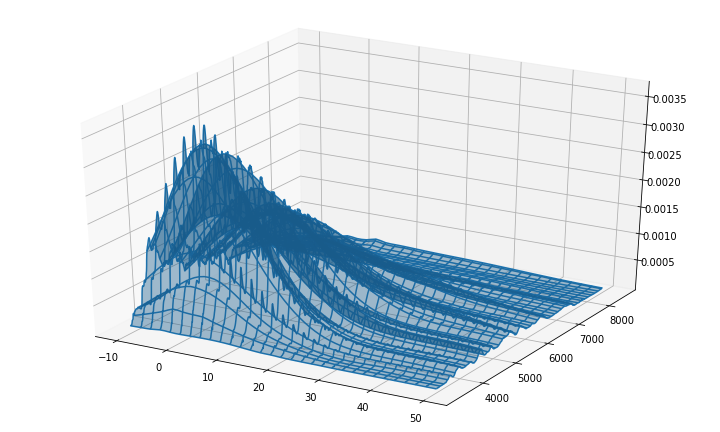

In [65]:
%matplotlib notebook

Z = interp.griddata((xx,yy),med,(B1,B2),method='cubic')
#Z = splinemean(B1, B2)
fig = plt.figure(figsize=(10,6))
ax = axes3d.Axes3D(fig)
ax.plot_wireframe(B1, B2, Z)
ax.plot_surface(B1, B2, Z,alpha=0.4)
#ax.scatter3D(xx,yy,pca.components_[0], c='r')
#ax3.set_xlim(3500, 7500)
#ax3.set_ylim(-10, 50)
#ax.set_zlim(0, max(pca.components_[1]))

plt.show()

In [66]:
Z = interp.griddata((xx,yy),skewness,(B1,B2),method='cubic')

In [67]:
teste = Z.transpose()

In [68]:
exp_x = []
exp_y = []
exp_z = []

for i in range(0,len(x)):
    
    for j in range(0,len(y)):
        
        exp_x.append(x[i])
        exp_y.append(y[j])
        exp_z.append(teste[i][j])

In [69]:
'''
table = []
for l in range(0,len(exp_x)):
    table.append((exp_x[l],exp_y[l],exp_z[l]))


completeName = os.path.join(save_path, "M2.dat")

f = open(completeName, 'w')
f.write(tabulate(table, tablefmt="plain"))
f.close()
'''

'\ntable = []\nfor l in range(0,len(exp_x)):\n    table.append((exp_x[l],exp_y[l],exp_z[l]))\n\n\ncompleteName = os.path.join(save_path, "M2.dat")\n\nf = open(completeName, \'w\')\nf.write(tabulate(table, tablefmt="plain"))\nf.close()\n'